In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("../../../Data/titanic_Dataset.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [51]:
df['Age'].fillna(df['Age'].mean() ,inplace=True)

C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1577657617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() ,inplace=True)


In [52]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(712, 2) (179, 2) (712,) (179,)


,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [54]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

# Using transformer 

In [55]:
from sklearn.preprocessing import FunctionTransformer
ftrf = FunctionTransformer(func=np.log1p)
X_train_trf = ftrf.fit_transform(X_train)
X_test_trf = ftrf.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
print("Accuracy score :",accuracy_score(y_test, y_pred))
# print("Cross val score :",(cross_val_score(estimator=LogisticRegression(),X=X,y=y,cv=10)).mean())


Accuracy score : 0.6815642458100558


In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred = clf.predict(X_test_trf)
print("Accuracy score :",accuracy_score(y_test, y_pred))

Accuracy score : 0.6871508379888268


# Compare distribution

In [58]:
import scipy.stats as stats

C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\2281876315.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\2281876315.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf['Age'])


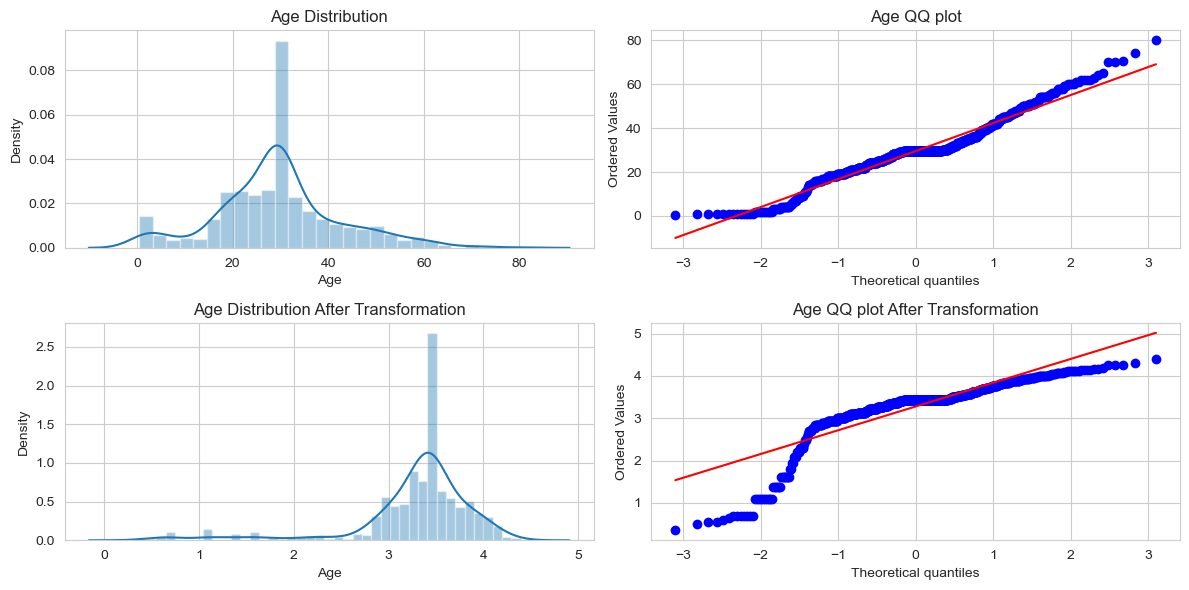

In [59]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(X_train['Age'])
plt.title('Age Distribution')

plt.subplot(222)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.subplot(223)
sns.distplot(X_train_trf['Age'])
plt.title('Age Distribution After Transformation')

plt.subplot(224)
stats.probplot(X_train_trf['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot After Transformation')

plt.tight_layout()


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\452952188.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\452952188.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf['Fare'])


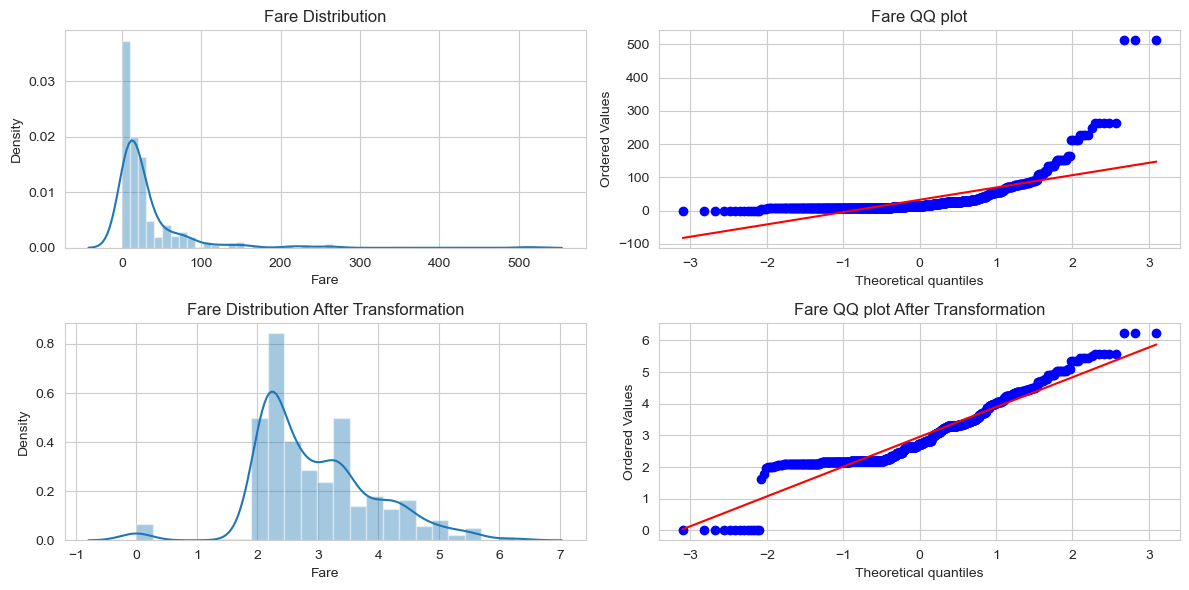

In [60]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(X_train['Fare'])
plt.title('Fare Distribution')

plt.subplot(222)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.subplot(223)
sns.distplot(X_train_trf['Fare'])
plt.title('Fare Distribution After Transformation')

plt.subplot(224)
stats.probplot(X_train_trf['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot After Transformation')

plt.tight_layout()


In [77]:
def functional_transformer(transformer_function):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    
    ftrf = FunctionTransformer(transformer_function)
    
    X_trf = ftrf.fit_transform(X)
    
    print((cross_val_score(estimator=LogisticRegression(),X=X_trf,y=y,cv=10)).mean())
    
    plt.figure(figsize=(12,6))

    plt.subplot(221)
    sns.distplot(X_trf['Age'])
    plt.title('Age Distribution')
    
    plt.subplot(222)
    stats.probplot(X_trf['Age'], dist='norm', plot=plt)
    plt.title('Age QQ plot')
    
    plt.subplot(223)
    sns.distplot(X_trf['Fare'])
    plt.title('Fare Distribution After Transformation')
    
    plt.subplot(224)
    stats.probplot(X_trf['Fare'], dist='norm', plot=plt)
    plt.title('Fare QQ plot After Transformation')
    
    plt.tight_layout()
    

0.6589013732833957


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


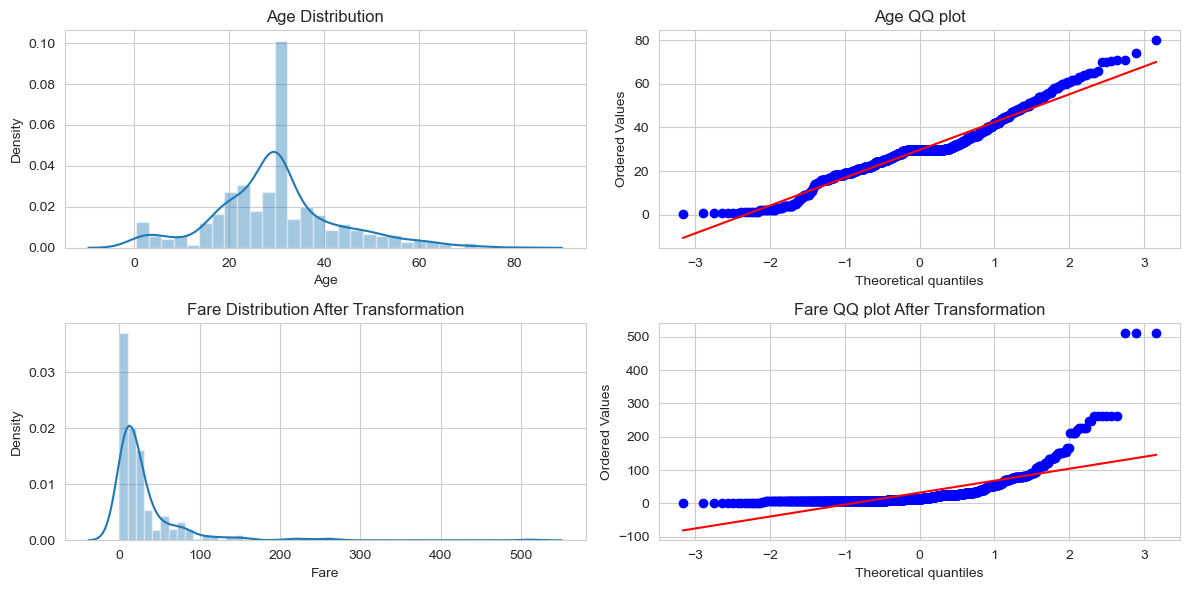

In [78]:
functional_transformer(lambda x:x)

0.678027465667915


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


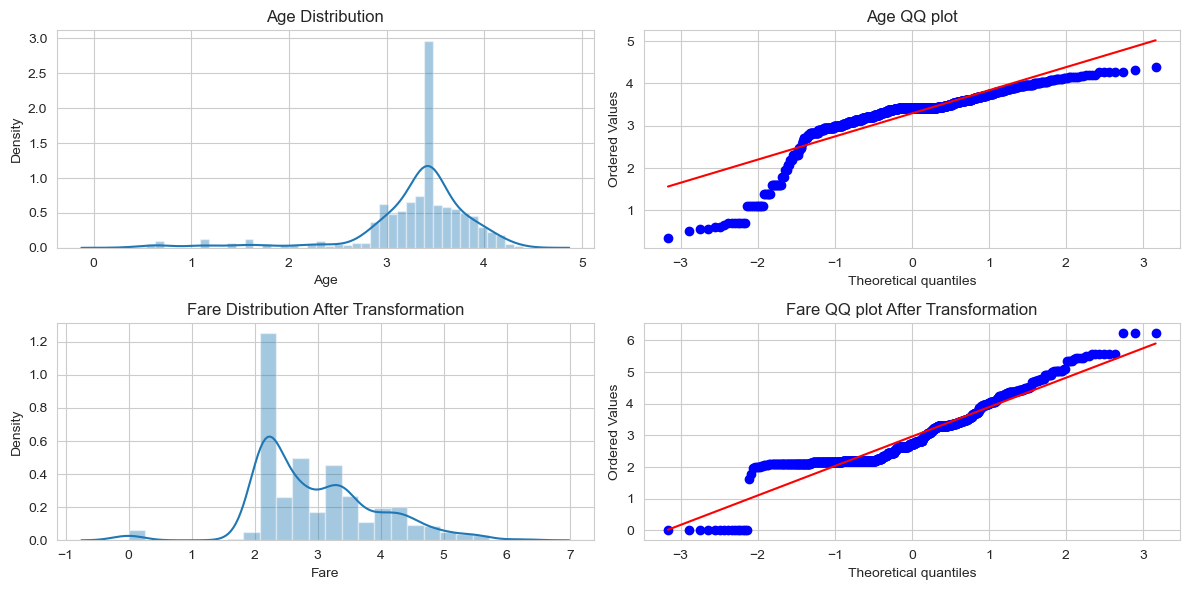

In [79]:
functional_transformer(lambda x:np.log1p(x))

0.6420099875156055


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


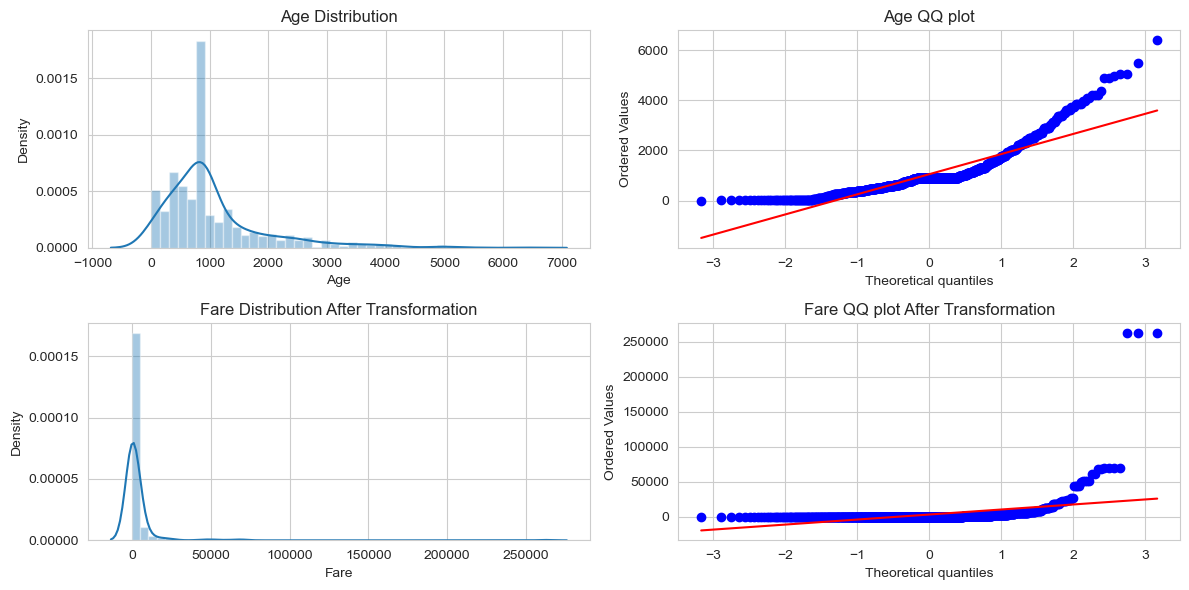

In [80]:
functional_transformer(lambda x:x**2)

0.6589013732833957


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


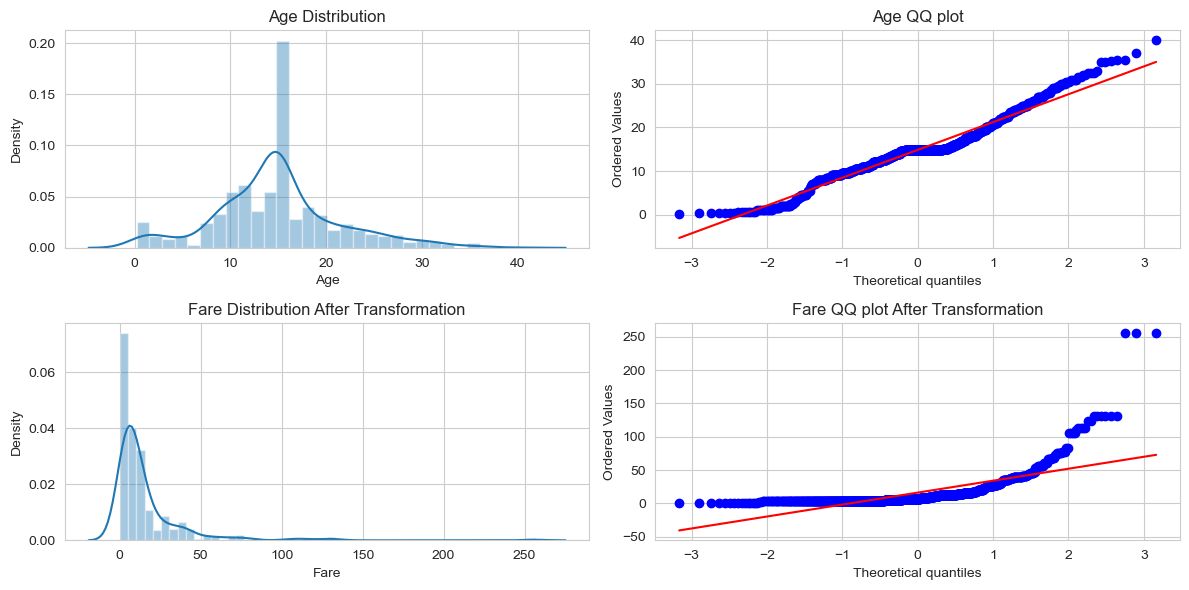

In [83]:
functional_transformer(lambda x:x**1/2)

0.616167290886392


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


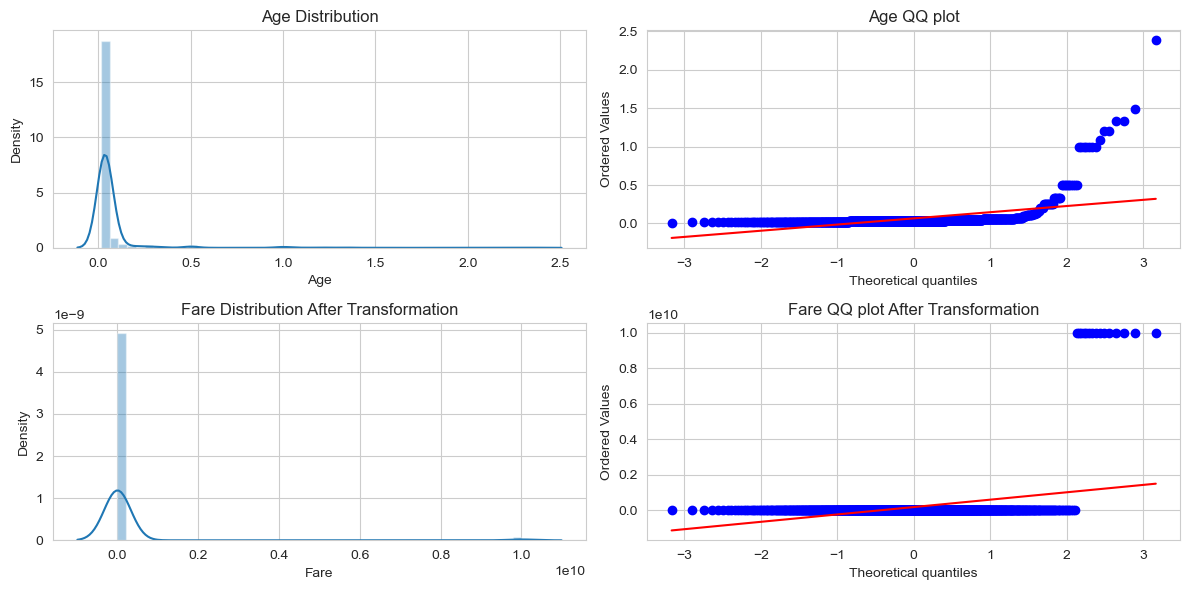

In [81]:
functional_transformer(lambda x: 1/(x+0.0000000001))

0.6082646691635455


C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Age'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_1928\1184753792.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trf['Fare'])


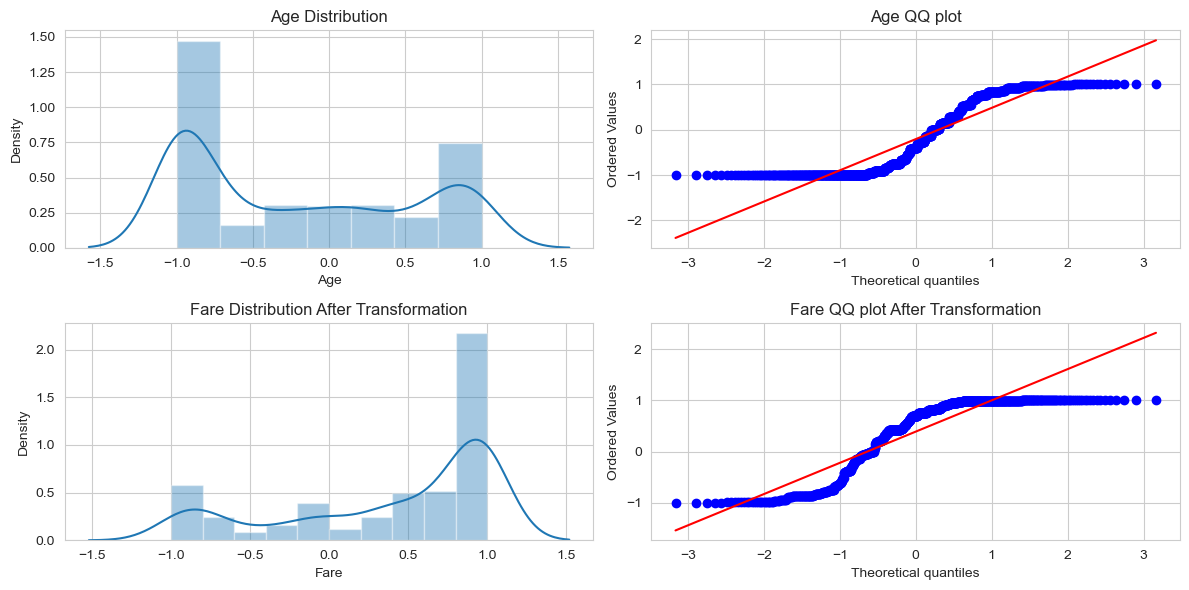

In [82]:
functional_transformer(np.sin)